In [1]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt


# Scraping

In [2]:
path="Data & AI Jobs in Egypt _ Trello.html"
with open(path) as file:
  soup = BeautifulSoup(file, 'html.parser')

In [3]:
name=[]
for i in range(141):
  name.append(soup.find_all("span",class_="list-card-title js-card-name")[i].contents[1])

In [4]:
title=""
list=[]
for j in range(141):
  title=""
  for i in soup.find_all("div",class_="list-card-labels js-card-labels")[j].contents:
    title+=i.contents[0].contents[0]+","
  
  list.append(title)

In [5]:
data = {name[i]:list[i] for i in range(141)}
df=pd.DataFrame.from_dict(data, orient='index',columns=["Job"])


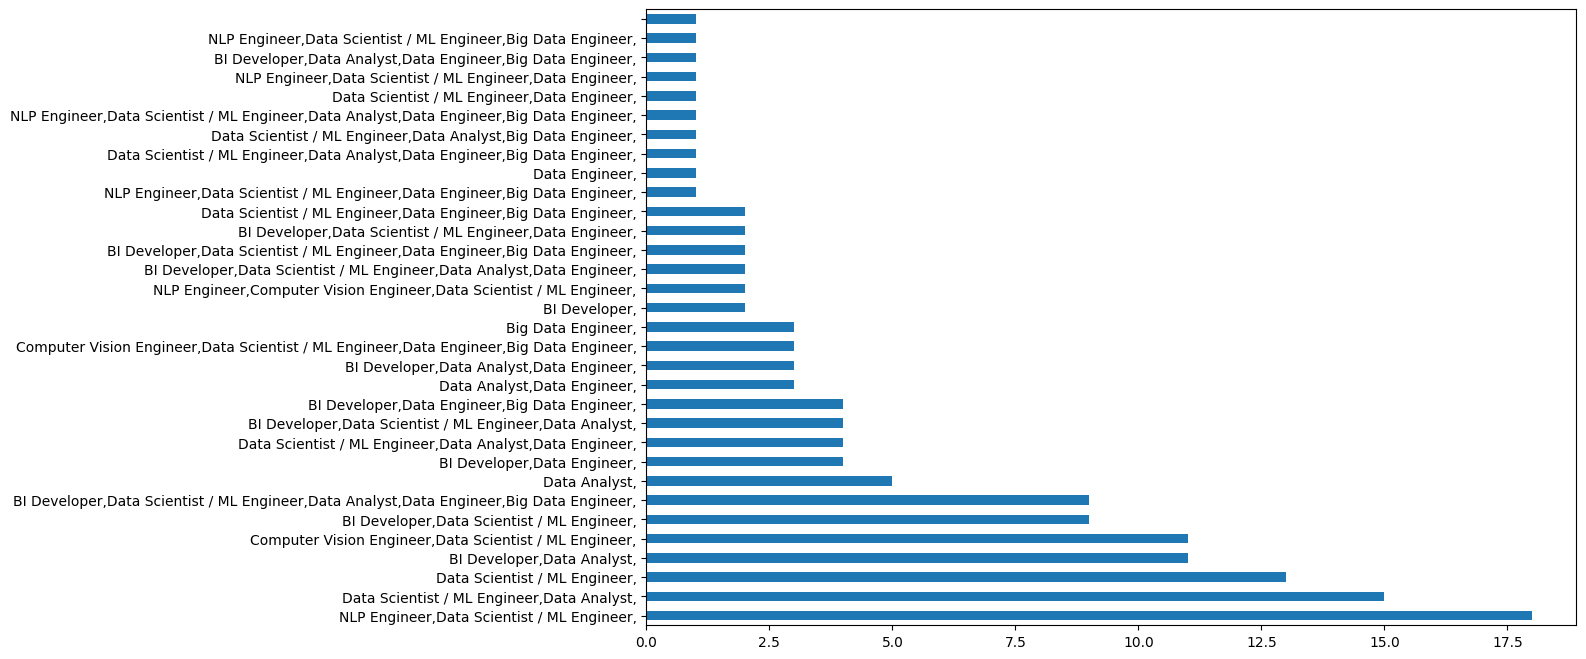

In [6]:
df['Job'].value_counts().plot.barh(figsize=(12,8))
plt.show()

In [7]:
x=df["Job"].apply(lambda x:x.split(","))
for i in x:
  i.remove("")


In [8]:
keywords={}
for i in x:
  for j in i:
    if j in keywords:
      keywords[j]+=1
    else:
      keywords[j]=1

In [9]:
df1=pd.DataFrame.from_dict(keywords, orient='index',columns=["Job"])
df1=df1.sort_values(by="Job",ascending=True)

# App deployment

In [77]:
import dash
from dash import html
from dash import dcc
import plotly.express as px
import dash
from dash import html
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output,State
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.graph_objects as go
import  matplotlib.pyplot as plt
import pandas as pd
from jupyter_dash import JupyterDash
import seaborn as sns; sns.set()

# app = dash.Dash(external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])
app=JupyterDash()
app.layout = html.Div(children=[
    html.H1('Job Finder ',style={'marginCenter':'10px','margin': '25px 25px 25px 25px','padding': '3px 10px','color': 'green','margin-left': 'auto' , 'margin-right': 'auto','width': '200px'}),
    
    
   html.Div(
    children=[dcc.Input(id='my-input1', value=None, type='text',style={'marginCenter':'10px', 'outline': '100px','margin': '25px 25px 25px 25px','padding': '15px 32px','border-radius': '4px'}),
             html.Button(id='scrape-button-state', children='Scrapny', n_clicks=0,style={'marginCenter':'10px', 'border': '2px solid #4CAF50','margin': '25px 25px 25px 25px','padding': '15px 32px','background-color': '#4CAF50','border-radius': '4px'})], 
    style=dict(display='flex', justifyContent='center')
) ,
    
    dcc.Graph(id="My_gragh"),
    dcc.Graph(id="gragh"),
    html.Div(
    children=[ dcc.Input(id='my-input', value=None, type='text',style={'marginCenter':'10px', 'outline': '100px','margin': '25px 25px 25px 25px','padding': '15px 32px','border-radius': '4px'}),
    
    html.Div(id="my_Div",style={'marginCenter':'10px', 'outline': '100px','margin': '25px 25px 25px 25px','padding': '15px 32px','border-radius': '4px','color': 'green'}),
    html.Button(id='submit-button-state', children='Submit', n_clicks=0,style={'marginCenter':'10px', 'border': '2px solid #4CAF50','margin': '25px 25px 25px 25px','padding': '15px 32px','background-color': '#4CAF50','border-radius': '4px'})], 
    style=dict(display='flex', justifyContent='center')
    
)
   
],style={'height': '200vh','background-image': 'url(https://images.unsplash.com/photo-1593371256584-ac70d0ab43d1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80)'})


@app.callback(
    
    
    Output (component_id='my_Div', component_property='children'),
    Output('gragh', 'figure'),
    State (component_id='my-input', component_property='value'),
    Input('submit-button-state',"n_clicks"))
    


def update_graph(input_value,n_clicks):
        
        
        x=model.predict([input_value])
        
        l.append(x)
        return x,px.bar(l,template="plotly_dark")


    
@app.callback(
    
    Output('My_gragh', 'figure'),
    State (component_id='my-input1', component_property='value'),
    Input('scrape-button-state',"n_clicks"))

def update_scrape(input,click):
            
    
    
            return px.bar(df1,orientation='h',template="plotly_dark")


    



In [78]:
if __name__=="__main__":
    app.run_server(port=5050,debug=True)

Dash app running on http://127.0.0.1:5050/


In [80]:
l=[]

# Text classification

In [13]:
path="Job titles and industries.csv"
data = pd.read_csv(path)
print("The duplicated data = ",data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("The duplicated data = ",data.duplicated().sum())
data = data.rename(columns={'job title': 'job_title'})
data.head()

The duplicated data =  4618
The duplicated data =  0


,job_title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


The classes after dropping the duplicated data: 
 IT             1529
Marketing      1203
Education       973
Accountancy     263
Name: industry, dtype: int64


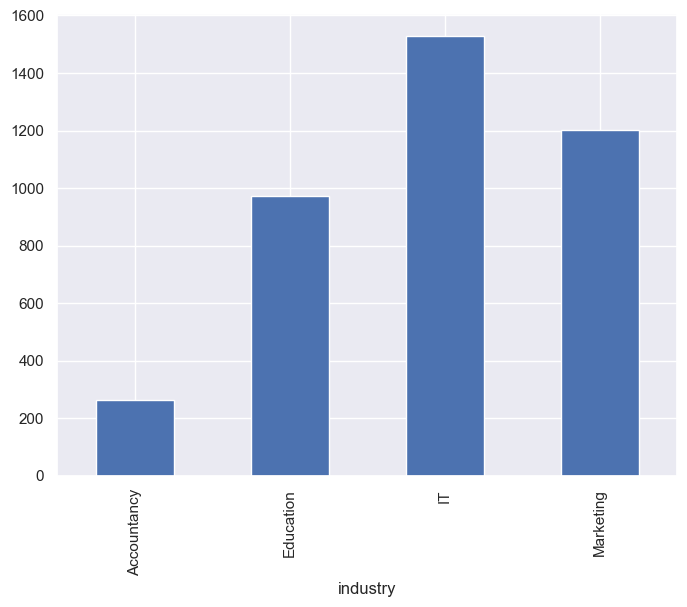

In [14]:
print("The classes after dropping the duplicated data: \n",data.industry.value_counts())
fig = plt.figure(figsize=(8,6))
data.groupby('industry').job_title.count().plot.bar(ylim=0)
plt.show()

In [15]:
from sklearn.utils import shuffle
data = shuffle(data,random_state=42)
x=data.job_title
y=data.industry


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
categories = ['Accountancy','Education','IT','Marketing']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.value_counts()

IT             306
Marketing      241
Education      187
Accountancy     60
Name: industry, dtype: int64

In [17]:
from sklearn.svm import LinearSVC
model = make_pipeline(TfidfVectorizer(), LinearSVC(class_weight="balanced"))

In [18]:
model.fit(X_train, y_train)
labels = model.predict(X_test)
print(model.score(y_test,labels))
print(metrics.classification_report(y_test, labels))

0.8929471032745592
              precision    recall  f1-score   support

 Accountancy       0.80      0.87      0.83        60
   Education       0.95      0.89      0.92       187
          IT       0.89      0.92      0.91       306
   Marketing       0.88      0.86      0.87       241

    accuracy                           0.89       794
   macro avg       0.88      0.89      0.88       794
weighted avg       0.89      0.89      0.89       794



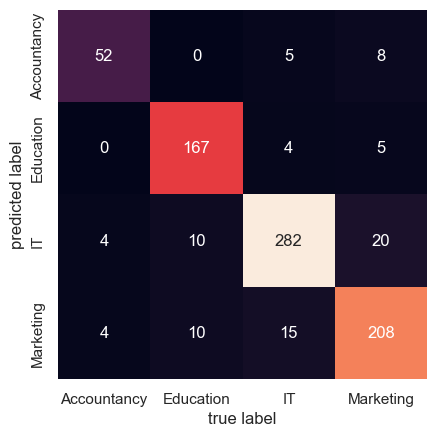

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [20]:
x="financial analysis"
model.predict([x])

array(['Accountancy'], dtype=object)

In [21]:
data[data["industry"]=="Accountancy"]

,job_title,industry
7400,platform analyst,Accountancy
7528,mixed tax assistant manager,Accountancy
7281,accounts assistant - harrogate,Accountancy
7299,finance manager,Accountancy
7372,"graduate data analyst - £21,000 - liverpool",Accountancy
...,...,...
7257,european credit controller / cash allocator,Accountancy
7536,immediate start accounts payable assistant,Accountancy
7531,legal finance assistant / cashier,Accountancy
7222,junior financial controller,Accountancy
